# K Nearest Neighbour (Phishing Dataset)

In [ ]:
#CellStrat - Load the phishing website dataset (this dataset has 11000+ data samples). Each sample has 30 website
#parameters and then a class label identifying it as a phishing website or not (1 or -1).

#The task is to train a KNN classifier which can detect phishing websites.

#Use 70% data for training and 30% for testing.

#Train the model using training data and then use it to predict the test data.

#Then print the count of misclassified samples in the test data prediction as well as the accuracy score of this prediction.

### Import modules

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

### Define Input and Output

In [19]:
import pandas as pd
phishing = pd.read_csv('C:/Users/nEW u/Desktop/project/Phishing detector with KNN/phishing_dataset.csv')
phishing

,index,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,6,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1
6,7,1,0,-1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,8,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,9,1,0,-1,1,1,-1,1,1,-1,...,1,1,1,-1,1,1,1,0,1,1
9,10,1,1,-1,1,1,-1,-1,1,-1,...,1,1,1,-1,0,-1,1,0,1,-1


In [20]:
phishing.shape

(11055, 32)

In [21]:

type(phishing)

pandas.core.frame.DataFrame

In [22]:
import numpy as np
phishing=phishing.values  ######converted to numpy


### Create X and Y data

In [23]:
X = phishing[:,1:31]  ########contains input data with
                     # 30 features
Y = phishing[:,31:] #####result


In [24]:
print(X.shape)  #(11055, 30)
print(Y.shape)   #(11055, 1)

(11055, 30)
(11055, 1)


In [25]:
print('Class labels:', np.unique(Y)) #[-1  1]

Class labels: [-1  1]


In [26]:
#############Convert  result y in to one dimensional
Y=Y.ravel()
print(Y.shape) # (11055,)


(11055,)


# Splitting data into 70% training and 30% test data:


In [27]:
# Splitting data into 70% training and 30% test data:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1, stratify=Y)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(7738, 30)
(7738,)
(3317, 30)
(3317,)


# Data evaluation using  logistic regression

In [28]:
#####create model logistic regression
from sklearn.linear_model import LogisticRegression
L=LogisticRegression(solver='liblinear')

In [29]:
##############Train The Model 
L.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
##############test the model
Y_pred=L.predict(X_test)

In [31]:
##########Use Confusion Matrix to find accuracy
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(Y_test,Y_pred)
print(confusion)
TP=confusion[1,1]#True Positive
TN=confusion[0,0]#True Negative
FP=confusion[0,1]#False Positive
FN=confusion[1,0]#False Negative
acc_logreg=(TP+TN)/(TP+TN+FP+FN)
acc_logreg=round(acc_logreg*100,2)
print("accuracy in logistic regression is",acc_logreg,"%")

[[1321  149]
 [ 101 1746]]
accuracy in logistic regression is 92.46 %


#  Using   KNN  MODEL 

In [32]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

In [33]:
##Train The Model 
KNN.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
#test the model
Y_pred_knn=KNN.predict(X_test)

In [35]:
#Use Confusion Matrix to find accuracy
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(Y_test,Y_pred_knn)
print(confusion)
TP=confusion[1,1]#True Positive
TN=confusion[0,0]#True Negative
FP=confusion[0,1]#False Positive
FN=confusion[1,0]#False Negative
acc_knn=(TP+TN)/(TP+TN+FP+FN)
acc_knn=round(acc_knn*100,2)
print("accuracy in knn is",acc_knn,"%")

[[1356  114]
 [  97 1750]]
accuracy in knn is 93.64 %


# Using  DECISION TREE CLASSIFIER

In [36]:
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()

In [37]:
#Train The Model 
DT.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
#test the model
Y_pred_DT=DT.predict(X_test)

In [39]:
#Use Confusion Matrix to find accuracy
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(Y_test,Y_pred_DT)
print(confusion)
TP=confusion[1,1]#True Positive
TN=confusion[0,0]#True Negative
FP=confusion[0,1]#False Positive
FN=confusion[1,0]#False Negative
acc_DT=(TP+TN)/(TP+TN+FP+FN)
acc_DT=round(acc_DT*100,2)
print("accuracy in Decision Tree is",acc_DT,"%")

[[1385   85]
 [  71 1776]]
accuracy in Decision Tree is 95.3 %


# Using  NAIVE BAYES CLASSIFIER

In [40]:
from sklearn.naive_bayes import GaussianNB
NAIVE= GaussianNB()

In [41]:
#Train The Model 
NAIVE.fit(X_train,Y_train)

GaussianNB(priors=None)

In [42]:
#test the model
Y_pred_naive=NAIVE.predict(X_test)

In [43]:
#Use Confusion Matrix to find accuracy
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(Y_test,Y_pred_naive)
print(confusion)
TP=confusion[1,1]#True Positive
TN=confusion[0,0]#True Negative
FP=confusion[0,1]#False Positive
FN=confusion[1,0]#False Negative
acc_naive=(TP+TN)/(TP+TN+FP+FN)
acc_naive=round(acc_naive*100,2)
print("accuracy in naive bayes is",acc_naive,"%")


[[1466    4]
 [1333  514]]
accuracy in naive bayes is 59.69 %


#  COMPARING THE MODELS

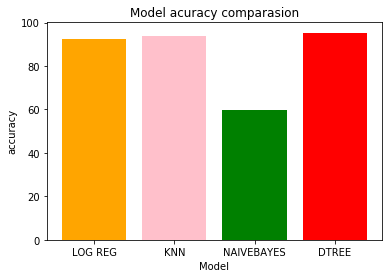

In [45]:
import matplotlib.pyplot as plt
result=[acc_logreg,acc_knn,acc_naive,acc_DT]
clf=['LOG REG','KNN','NAIVEBAYES','DTREE']
plt.bar(clf,result,color=['orange','pink','green','red'])
plt.ylabel("accuracy")
plt.xlabel("Model")
plt.title("Model acuracy comparasion")
plt.show()

In [47]:
'''  Among these 4 models Decision Tree has highest accuracy'''

'  Among these 4 models Decision Tree has highest accuracy'